<a href="https://colab.research.google.com/github/loicpages/qmII_group_rep/blob/main/(NaN_dropped)SA_Food_Aid_Availability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#importing libraries 
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [11]:
#importing data with pandas 
data_path = '/content/df_final_use.csv'
general_dfi = pd.read_csv(data_path, encoding ='latin-1')
general_df = general_dfi.fillna(method='pad')
general_df = general_dfi.dropna()
general_df = general_df.reset_index(drop=True)
general_df

,Country,Year,Food Availibility per capita (kg/cap/year),Production Quantity (Grains & Ce.+ Root Crops)(1000MT),Import Quantity (Grains & Ce.)(1000MT),Export Quantity (Grains & Ce.)(1000MT),Import Quantity (Root Crops)(1000MT),Export Quantity (Root Crops)(1000MT),Population (Million),Non-Cereal Food Aid (Grain Equiv. 1000MT),Cereal Food Aid (Grain Equiv. 1000MT),Imports (all)(1000MT),Exports (all)(1000MT),Production Quantity per capita (kg/cap/year),Imports (all) per capita (kg/cap/year),Exports (all) per capita (kg/cap/year),Production + net ex-imports (kg/cap/year),Total Food Aid,Total Food Aid per capita (kg/cap/year),Region
0,Algeria,1988,218.458482,1267.207343,5368.040,0.342,39.047062,0.097241,24.035,13.163940,8.902811,5407.087062,0.439241,52.723418,224.967217,0.018275,277.672360,22.066751,0.918109,North Africa
1,Algeria,1989,217.210697,2259.764449,8090.373,0.000,40.698205,0.000000,24.668,9.759403,36.557491,8131.071205,0.000000,91.607121,329.620205,0.000000,421.227325,46.316894,1.877610,North Africa
2,Algeria,1990,230.949959,1831.752091,4595.300,0.000,44.264406,0.113870,25.299,5.521550,4.608922,4639.564406,0.113870,72.404130,183.389241,0.004501,255.788870,10.130472,0.400430,North Africa
3,Algeria,1991,239.859144,4082.130235,4385.000,0.000,41.248665,0.000000,25.931,3.351595,39.210113,4426.248665,0.000000,157.422785,170.693327,0.000000,328.116112,42.561708,1.641345,North Africa
4,Algeria,1992,222.393113,3623.871137,3922.700,0.000,21.734742,0.723534,26.558,7.787651,10.904214,3944.434742,0.723534,136.451206,148.521528,0.027244,284.945491,18.691865,0.703813,North Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,Zimbabwe,2008,153.700079,932.603468,1007.425,0.000,0.545611,0.004930,12.452,88.673575,315.808599,1007.970611,0.004930,74.895878,80.948491,0.000396,155.843973,404.482174,32.483310,Southern Africa
1779,Zimbabwe,2009,141.317483,1677.731196,576.300,0.000,2.163975,0.014400,12.474,69.115038,217.997711,578.463975,0.014400,134.498252,46.373575,0.001154,180.870673,287.112748,23.016895,Southern Africa
1780,Zimbabwe,2010,136.990970,1723.572567,368.600,0.000,2.163975,0.014400,12.571,34.650952,63.648974,370.763975,0.014400,137.107037,29.493594,0.001145,166.599486,98.299925,7.819579,Southern Africa
1781,Zimbabwe,2011,139.933312,1765.470308,640.000,0.000,2.163975,0.014400,12.754,24.445836,32.984747,642.163975,0.014400,138.424832,50.350006,0.001129,188.773709,57.430583,4.502947,Southern Africa


In [12]:
#creating a function to create scatter plots for each country showing the relationship between two variables  
def plot_country(country, feature1, feature2, plot=True, show=True):
  country_feature1= general_df[general_df['Country']==country][feature1]
  df_feature1=pd.DataFrame(country_feature1)  

  country_feature2= general_df[general_df['Country']==country][feature2]
  df_feature2 =pd.DataFrame(country_feature2) 

  merged = df_feature1.merge(df_feature2, left_index=True, right_index=True)

  if plot:
    merged.plot(x=feature1, y=feature2, kind = 'scatter')
    plt.title(country)
  
  #adding a linear regression line 
  x=merged[feature1]
  y=merged[feature2]
  x= x.to_numpy()
  y= y.to_numpy()
  #calculating the slope and y-intercept values 
  m, b = np.polyfit(x, y, 1)
  if plot:
    plt.plot(x, m*x+b, c='red')
  if show:
    print(country)
    print(m)
    print(b)
  
  #calculating the R square value for each country 
  temp= np.corrcoef(x,y)
  temp[0,1]**2
  rS2=temp[0,1]**2
  if show:
    print(rS2)

  corr = merged.corr()
  return corr

Zimbabwe
0.012050717851455985
158.66451364506702
0.00018271240125583617
Zambia
0.4511086402280969
151.88424397218793
0.09875700369597638
Swaziland
0.10479403278059035
166.28339169929984
0.003774031372444954
Namibia
-0.6832798810454705
167.42279180082366
0.08031456449982158
Mozambique
-1.0277955026778895
212.8306697849247
0.41574166136705026
Malawi
-0.7343220063186496
198.04959482010048
0.3410890495855466
Madagascar
-1.6758418712693413
187.90430322054425
0.09634017467443899
Lesotho
1.3648053044733552
155.67203424422024
0.35406173698749877


,Total Food Aid per capita (kg/cap/year),Food Availibility per capita (kg/cap/year)
Total Food Aid per capita (kg/cap/year),1.000000,0.595031
Food Availibility per capita (kg/cap/year),0.595031,1.000000


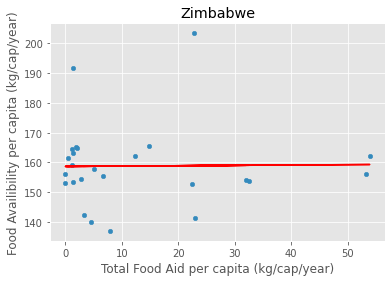

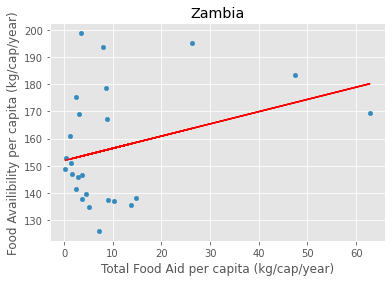

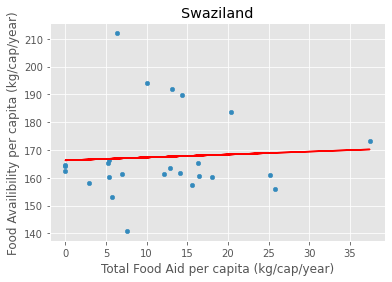

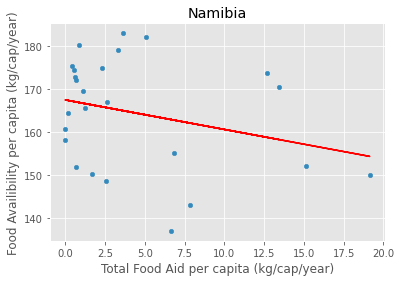

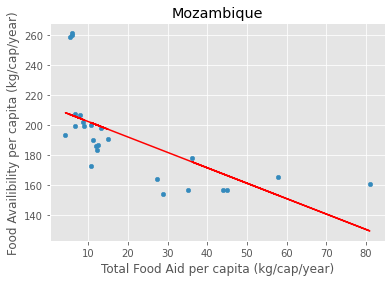

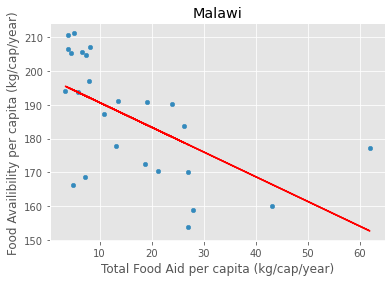

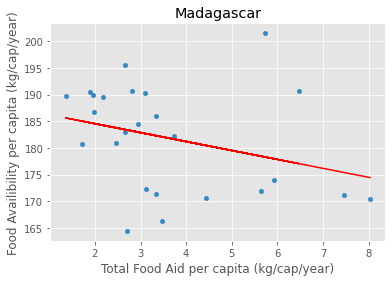

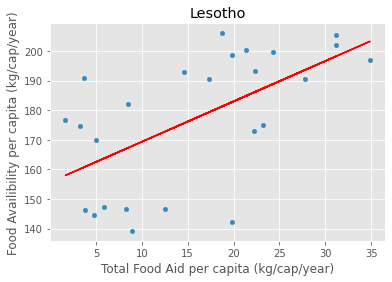

In [13]:
#calling the function for every country in Southern Africa, choosing food aid per capita and food availibility per capitaas the arguments
#this allows us to explore the relationship between food aid per capita and food availability per capita 
plot_country('Zimbabwe','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Zambia','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Swaziland','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Namibia','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Mozambique','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Malawi','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Madagascar','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Lesotho','Total Food Aid per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')

In [14]:
#calculating the correlation coefficient between food aid per capita and food availability per capita 
countries = ['Zimbabwe', 'Zambia','Swaziland', 'Namibia', 'Mozambique','Malawi', 'Madagascar', 'Lesotho']

feature1= 'Total Food Aid per capita (kg/cap/year)'
feature2= 'Food Availibility per capita (kg/cap/year)'

list_of_correlations = []

for country in countries : 
  corr = plot_country(country, feature1, feature2, False, False)
  list_of_correlations.append((country,corr))

for corr in list_of_correlations : 
  print(corr[0], corr[1])

Zimbabwe                                             Total Food Aid per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Total Food Aid per capita (kg/cap/year)                                    1.000000                                    0.013517
Food Availibility per capita (kg/cap/year)                                 0.013517                                    1.000000
Zambia                                             Total Food Aid per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Total Food Aid per capita (kg/cap/year)                                    1.000000                                    0.314256
Food Availibility per capita (kg/cap/year)                                 0.314256                                    1.000000
Swaziland                                             Total Food Aid per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Total Food Aid per capita (kg/cap/year)                                    1.0